# Support Vector Regression
> Parthiv Desai

> CPSC - 483 - 03 

#Importing the libraries

In [16]:
import numpy as np #Numpy is widely used library for handling number
import matplotlib.pyplot as plt  #Provides a library for data visualization for plotting graphs
import pandas as pd #Used for data manipulation

#Importing the dataset

In [27]:
dataset = pd.read_csv("/content/drive/MyDrive/Data_regression_project.csv") #Pull the Position_Salaries_poly-1.csv file from CSV into a variable.
x_values = dataset.iloc[:, :-1].values #Indexing all the values till the last row.
y = dataset.iloc[:, -1].values #Indexing all the values till the last column.

In [28]:
from sklearn.model_selection import train_test_split #Splitting data into random train and test basically converting the data into a one-liner
X_train,X_test,y_train,y_test = train_test_split(x_values,y,test_size = 0.2,random_state= 0) #Assign the test size at 0.3 so 70% of the data will be used for training and 30% will be used for testing.Random state is used for deciding the splitting of a given data by initializing the internal random number 

Reshaping y value in the dataset

In [29]:
y= y.reshape(-1,1) #Reshaping the y values explicitely tell the dimension.

#Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler #Importing the library 
sc_xvalues = StandardScaler() #Normalize each variable in x_values.
sc_y = StandardScaler() #Normalize each variable in y.
x_values = sc_xvalues.fit_transform(x_values) #Fitting and transforming the data x_values for storing the data for mean and standard deviation.
y = sc_y.fit_transform(y) #Fitting and transforming the data y for storing the data for mean and standard deviation.

#Training the SVR model on the whole dataset

In [31]:
from sklearn.svm import SVR #Importing the SVR model.
regressor = SVR() #Creating a default model object.
regressor.fit(x_values, y)#Fitting the model on the dataset.

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#Predicting a new result

In [32]:
y_pred = regressor.predict(X_test)#Predicting the new result

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared:",r2)

R-squared: -705.9607298956481


#Visualising the SVR results

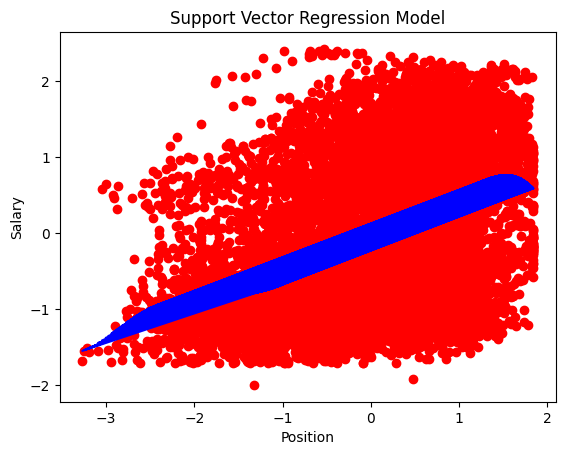

In [25]:
plt.scatter(x_values, y, color = 'red')
plt.plot(x_values, regressor.predict(x_values), color = 'blue')
plt.title('Support Vector Regression Model')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

#Visualising the SVR results (for higher resolution and smoother curve)

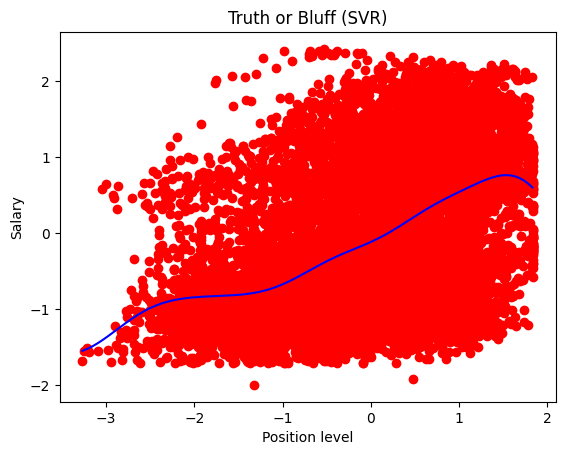

In [26]:
X_grid = np.arange(min(x_values), max(x_values), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_values, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()